In [1]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 붓꽃 csv 데이터 읽어오기
iris = pd.read_csv ("./Datasets/iris.csv")


In [3]:
# 열의 정보 보기
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 필요한 열 추출하여 X,y 나눠주기
X =  iris [['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = iris ['Name']

In [6]:
# Name unique 값 보기
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기

train_X, test_X, train_y, test_y = train_test_split (X, y)

In [8]:
# 잘 나누어졌는지 확인하기
print ('train_X의 크기:', train_X.shape )
print ('train_y의 크기:', train_y.shape)

train_X의 크기: (112, 4)
train_y의 크기: (112,)


In [9]:
print ('test_X의 크기:', test_X.shape)
print ('test_y의 크기: ', test_y.shape)

test_X의 크기: (38, 4)
test_y의 크기:  (38,)


In [30]:
print ('test_X의 크기: {}'.format (test_X.shape))

test_X의 크기: (38, 4)


### seaborn을 이용한 산점도 행렬

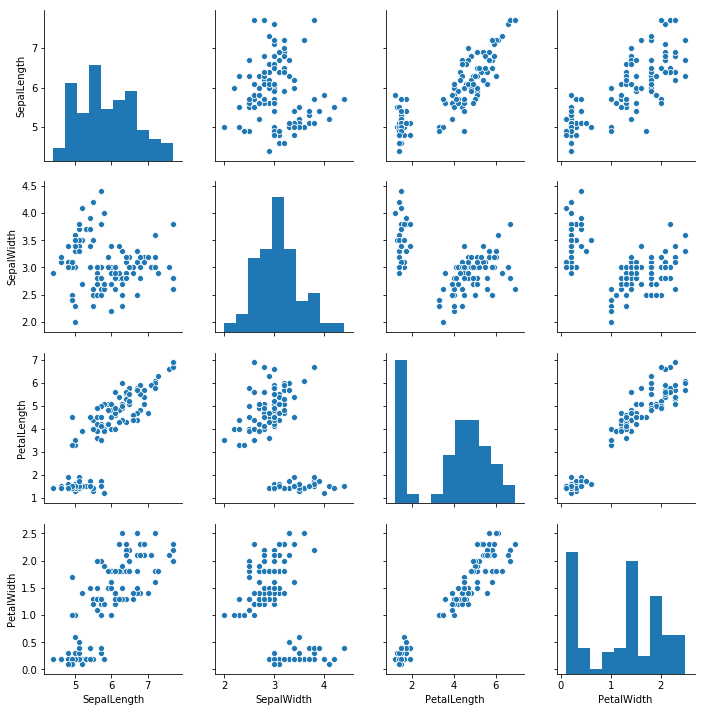

In [10]:
#seaborn을 이용한 산점도 행렬(scatterplot matrix by seaborn)
sns.pairplot (train_X, diag_kind = 'hist')
plt.show()

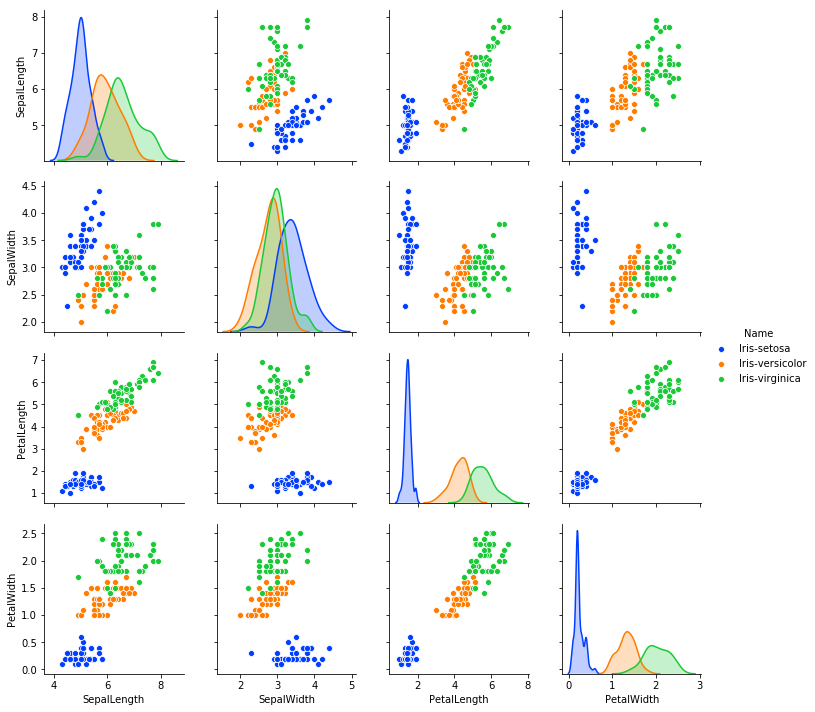

In [11]:
# kde 를 이용해서 각 그룹별 밀도 알아보기
sns.pairplot (iris, 
              diag_kind = 'kde',
             hue = 'Name',
             palette = 'bright')    #Kernel Density Estimation
plt.show()

### pandas를 이용한 산점도 행렬(scatterplot matrix by pandas)

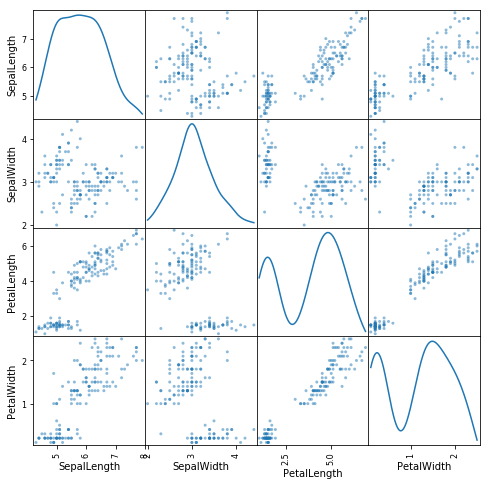

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix (iris, 
                alpha = 0.5,
                figsize = (8,8),
               diagonal = 'kde')

plt.show()

## SVM 이용하여 예측하기

In [13]:
# 데이터 학습하고 예측하기

svm = svm.SVC()  # support vector classification
svm.fit (train_X, train_y)
svm_prediction = svm.predict(test_X)

/Users/jungseolee/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
# 정답률 구하기
svm_score = metrics.accuracy_score (test_y, svm_prediction)
print(svm_score)

0.9736842105263158


## KneighborsClassifier 이용하여 예측

knn 객체는 훈련 데이터로 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors = 1)

In [16]:
knn.fit (train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
# prediction 테스트해보기
import numpy as np
new_X = np.array ([[5, 2.9, 1, 0.2]])

In [18]:
test_prediction = knn.predict (new_X)
print ("예측 :", test_prediction)
print ("예측한 타깃의 이름 : ", iris['Name'][test_prediction])

예측 : ['Iris-setosa']
예측한 타깃의 이름 :  Iris-setosa    NaN
Name: Name, dtype: object


In [19]:
knn.fit (train_X, train_y)
knn_prediction = knn.predict (test_X)

In [22]:
# 테스트의 정확도 측정하기1 with metrics.accuracy_score
knn_score1 = metrics.accuracy_score (test_y, knn_prediction)
print(knn_score1)

0.9473684210526315


In [25]:
# 테스트의 정확도 측정하기2 with np.mean
('테스트 세트의 정확도 : {:.2f}'.format(np.mean (knn_prediction == test_y)))

'테스트 세트의 정확도 : 0.95'